In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
np.random.seed(11)


In [6]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]
N = 500
x0 = np.random.multivariate_normal(means[0],cov,N)
x1 = np.random.multivariate_normal(means[1],cov,N)
x2 = np.random.multivariate_normal(means[2],cov,N)
X = np.concatenate((x0,x1,x2),axis=0)
K = 3 
original_label = np.asarray([0]*N + [1]*N+[2]*N).T
original_label.shape

(1500,)

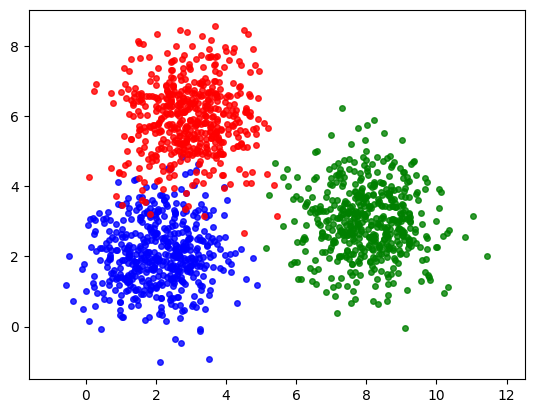

In [52]:
def KmeansDisplay(X,label):
    K = np.amax(label)+1
    X0 =X[label == 0,:]
    X1 =X[label == 1,:]
    X2 =X[label == 2,:]

plt.plot(x0[:,0],x0[:,1],'bo',markersize = 4,alpha = 0.8)
plt.plot(x1[:,0],x1[:,1],'go',markersize = 4,alpha = 0.8)
plt.plot(x2[:,0],x2[:,1],'ro',markersize = 4,alpha = 0.8)
plt.axis('equal')
plt.show()



In [51]:
KmeansDisplay(X,original_label)

In [19]:
def kmeans_init_centers(X,k):
    return X[np.random.choice(X.shape[0],k,replace = False)]
def kmeans_assign_labels(X,centers):
    D=cdist(X,centers)
    return np.argmin(D,axis=1)
def kmeans_update_centers(X,labels,K):
    centers = np.zeros((K,X.shape[1]))
    for k in range(K):
        Xk = X[labels==k,:]
        centers[k,:] = np.mean(Xk,axis=0)
    return centers
def has_converged(centers,new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))


In [23]:
def kmean(x,k):
    
    centers = [kmeans_init_centers(X,K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X,centers[-1]))
        new_center = kmeans_update_centers(X,labels[-1],K)
        if has_converged(centers[-1],new_center):
            break
        centers.append(new_center)
        it += 1
    return (centers,labels,it)

In [37]:
(center,labels,it) = kmean(X,K)
print(center[-1])


[[2.49917788 4.00900526]
 [7.06210902 2.92459317]
 [8.73090918 3.04394544]]


In [38]:
centers = [kmeans_init_centers(X,K)]
d = kmeans_assign_labels(X,centers[-1])
print(d[150])

1


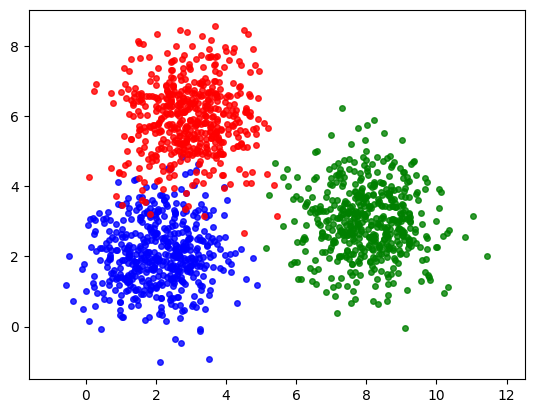

In [54]:


K = np.amax,labels[-1]+1
X0 =X[labels[-1] == 0,:]
X1 =X[labels[-1] == 1,:]
X2 =X[labels[-1] == 2,:]

plt.plot(x0[:,0],x0[:,1],'bo',markersize = 4,alpha = 0.8)
plt.plot(x1[:,0],x1[:,1],'go',markersize = 4,alpha = 0.8)
plt.plot(x2[:,0],x2[:,1],'ro',markersize = 4,alpha = 0.8)
plt.axis('equal')
plt.show()

C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[8.01802292 2.99780722]
 [2.98986507 6.00648699]
 [2.05626402 2.07438566]]


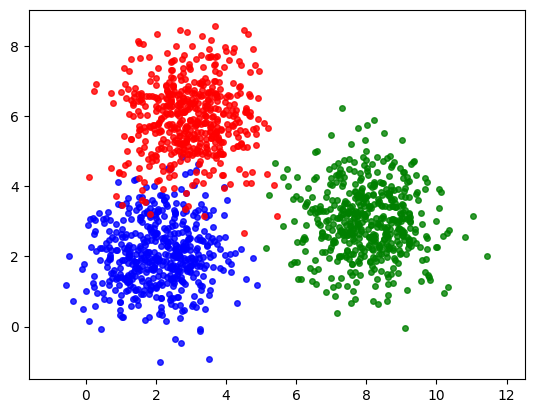

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)

K = np.amax,pred_label+1
X0 =X[pred_label == 0,:]
X1 =X[pred_label == 1,:]
X2 =X[pred_label == 2,:]

plt.plot(x0[:,0],x0[:,1],'bo',markersize = 4,alpha = 0.8)
plt.plot(x1[:,0],x1[:,1],'go',markersize = 4,alpha = 0.8)
plt.plot(x2[:,0],x2[:,1],'ro',markersize = 4,alpha = 0.8)
plt.axis('equal')
plt.show()